In [373]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

import time

In [374]:
train_data_x=[]
train_data_y=[]
test_data_x=[]
test_data_y=[]
d=28*28
n_train=6000
n_test = 750

for lettre in ["A", "B", "C"] :
    for image_path in glob.glob("./data/train/"+lettre+"/*.png"):
        train_data_x.append(mpimg.imread(image_path))
        if lettre=="A" :
            train_data_y.append(1)
        else :
            train_data_y.append(-1) 
    for image_path in glob.glob("./data/test/"+lettre+"/*.png"):
        test_data_x.append(mpimg.imread(image_path))
        if lettre=="A" :
            test_data_y.append(1)
        else :
            test_data_y.append(-1)

In [421]:
X_train=np.reshape(train_data_x,(n_train,d)) 
Y_train=np.array(train_data_y)
X_test=np.reshape(test_data_x,(n_test,d)) 
Y_test=np.array(test_data_y)

randperm = np.random.permutation(X_train.shape[0])
X_train = X_train[randperm,:]
Y_train = Y_train[randperm]

n_small = 700
X_train=X_train[:n_small]
Y_train = Y_train[:n_small]

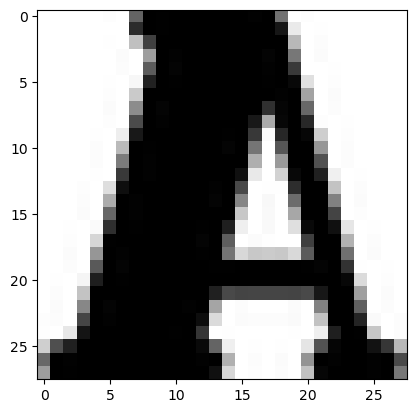

This picture has the label A


In [651]:
i = np.random.randint(n_small)
plt.imshow(np.reshape(X_train[i],(28,28)), cmap='binary')
plt.show()
if Y_train[i]==1 : tag = "A" 
else : tag = "B or C"
print("This picture has the label " + tag)

In [415]:
def emp_risk(theta):
    return np.linalg.norm(Y_train-X_train@theta)**2/n_small

def test_risk(theta):
    return np.linalg.norm(Y_test-X_test@theta)**2/n_test

In [416]:
def grad_emp_risk(theta):
    return -2*X_train.T@(Y_train-X_train@theta)/n_small

In [582]:
T_gd = 500
emp_risks_gd = np.zeros(T_gd)
test_risks_gd = np.zeros(T_gd)
theta_gd = np.zeros(X_train.shape[1])
gamma = 0.003
for t in range(T_gd):
    emp_risks_gd[t] = emp_risk(theta_gd)
    test_risks_gd[t] = test_risk(theta_gd)
    theta_gd -= gamma*grad_emp_risk(theta_gd)

In [583]:
def grad_sto(theta,i):
    return -2*(Y_train[i%n_small]-X_train[i%n_small]@theta)*X_train[i%n_small]

In [584]:
T_sgd = T_gd*n_small
T_test_period = 1000
emp_risks_sgd = np.zeros(int(T_sgd/T_test_period)+1)
test_risks_sgd = np.zeros(int(T_sgd/T_test_period)+1)
theta_sgd = np.zeros(X_train.shape[1])
gamma = 0.00002
for t in range(T_sgd):
    if t%T_test_period == 0:
        emp_risks_sgd[int(t/T_test_period)] = emp_risk(theta_sgd)
        test_risks_sgd[int(t/T_test_period)] = test_risk(theta_sgd)    
    theta_sgd -= gamma*grad_sto(theta_sgd,t)

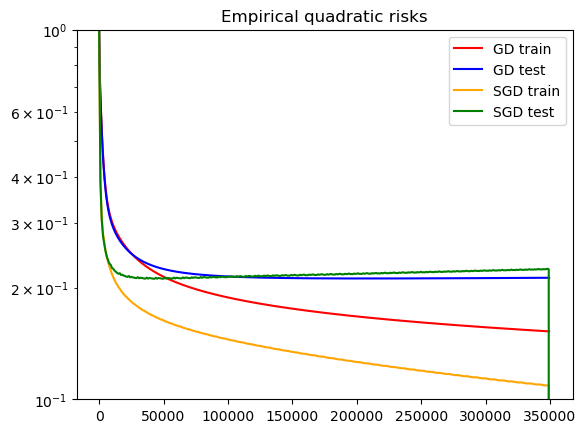

In [585]:
ts_gd = [n_small*t for t in range(T_gd)]
ts_sgd = [t*T_test_period for t in range(int(T_sgd/T_test_period)+1)]
plt.semilogy(ts_gd, emp_risks_gd, 'red', label='GD train')
plt.semilogy(ts_gd, test_risks_gd, 'blue', label='GD test')
plt.semilogy(ts_sgd, emp_risks_sgd, 'orange', label = 'SGD train')
plt.semilogy(ts_sgd, test_risks_sgd, 'green', label = 'SGD test')
plt.legend()
plt.ylim(10**(-1),1)
plt.title('Empirical quadratic risks')
plt.show()

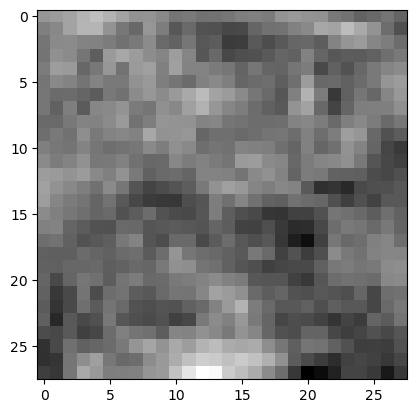

In [587]:
plt.imshow(np.reshape(theta_gd,(28,28)), cmap='binary')
plt.show()

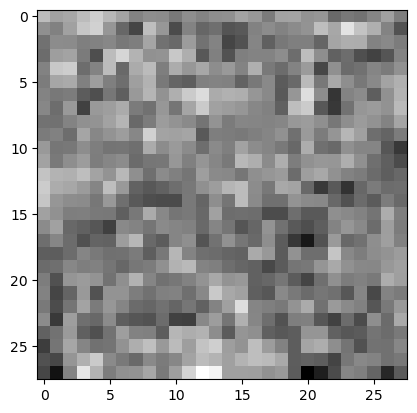

In [588]:
plt.imshow(np.reshape(theta_sgd,(28,28)), cmap='binary')
plt.show()

In [596]:
def L(s,y):  return 1/s.shape[0] * sum( np.log( 1 + np.exp(-s.reshape(y.shape)*y) ) )
def E(w): return L((X_train@w).reshape(Y_train.shape),Y_train);

In [597]:
def theta(v): return 1 / (1+np.exp(-np.clip(v,-30,30)))
def nablaL(s,r): return - 1/s.shape[0] * r * theta(-s * r)
def nablaE(w): return X_train.transpose().dot( nablaL((X_train@w).reshape(Y_train.shape),Y_train) )

In [631]:
n_steps = 1500

def lr(tau) :
    w = np.zeros(d)
    E_decay = [E(w)]*n_steps
    for k in range(n_steps):
        w = w - tau * nablaE(w)
        E_decay[k]=E(w)
        E_decay = np.array(E_decay)
    return w,E_decay

In [634]:
tau_max = 2/(1/4 * np.linalg.norm(X_train, 2)**2 )
tau_list = [0.5,0.1,0.7]

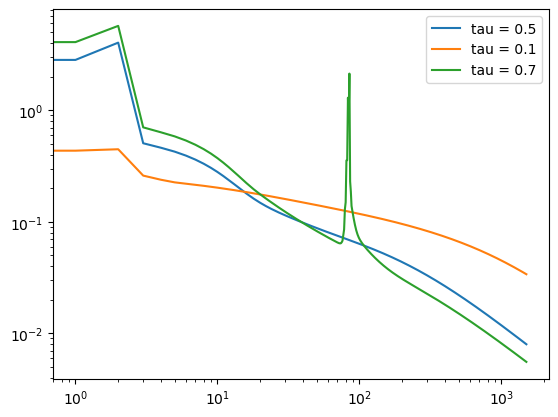

In [637]:
a_steps = np.array(list(range(n_steps)))
for tau in tau_list : 
    w,E_decay = lr(tau)
    plt.loglog(a_steps,E_decay,label = f'tau = {tau}')

    
plt.legend()
plt.show()

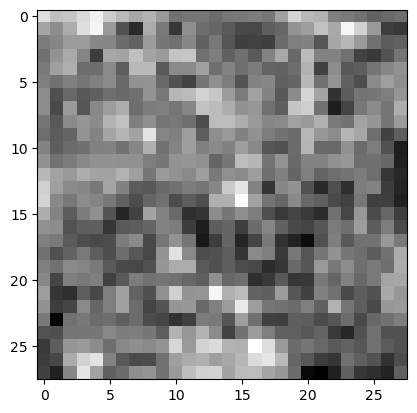

In [638]:
plt.imshow(np.reshape(w,(28,28)), cmap='binary')
plt.show()